# Clustering - a world of patterns

Today, we're talking about **clustering**;

Clustering is a tool we use to find patterns in messy data. Actually, we can find patterns in anything... as long as we remember that clustering only makes sense if we understand the data we feed the model.

Clustering is a general term for a multitude of algorithms that looks for patterns - from the very simple to the very complex to the downright weird.

Celebs that enjoy clustering:

![tech-giants](https://4.bp.blogspot.com/-X7BHS66c1U8/UlX7OcLfnWI/AAAAAAAABnU/83lHDaDPeng/s1600/logos.png)

Why do they enjoy clustering?

Because it's a great way to maximize profits, sell more crap and make sure they hit the right market-segment.

![old](https://www.fish-marketing.com/site/wp-content/uploads/2018/01/blog.jpg)

Let's import some stuff we need. I have this weird thing (it's not really weird, it's the only reasonable way of doing it, but you know.... sometimes objective truth just isn't for everyone) where I import my stuff first. No importing stuff along the way. It looks messy and we lack an overview.

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

The main packages are:
* Pandas
* Matplotlib
* Scikit-learn (her sklearn)
* Scipy

I should be using *Seaborn* as a visualization tool but it makes the weirdest dendrogram (more on that later) so I'll just stick with good 'ol matty-lib.


I'm using data from the Danish Value Study from 1999. I know - it's super old. I was 13 years old when that survey was made and.... I suddenly feel old. Nevertheless, I always use this data when I introduce to clustering. Why? Because it does something really neat

Data is here:

In [12]:
df=pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99_dataset.csv")

In [13]:
df.head()

,gender,income,criminals,diffrace,leftwings,alcoholics,rightwings,manykids,neurotics,muslims,imigrants,aids,addicts,homoseksuals,jews,gypsies,age,edu,id
0,2,900000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48,4,1
1,1,180000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,30,4,2
2,1,600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,3,3
3,2,180000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,55,0,4
4,2,60000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,0,5


## Making sense of the data?

Let's play around with the data. I've made a simple groupby to check different aspects of "manual clustering". What are you guys able to find? Who wants to live next to whom?

In [14]:
df.groupby(["edu", "gender"]).mean()

income  criminals  diffrace  leftwings  alcoholics  \
edu gender                                                              
0   1       312434.343434   0.292929  0.060606   0.070707    0.262626   
    2       295356.433071   0.346457  0.094488   0.078740    0.409449   
1   1       395940.289941   0.313609  0.112426   0.112426    0.337278   
    2       342100.000000   0.320000  0.070000   0.050000    0.310000   
2   1       401923.076923   0.269231  0.076923   0.346154    0.423077   
    2       366679.245283   0.490566  0.094340   0.037736    0.396226   
3   1       425056.603774   0.216981  0.066038   0.113208    0.386792   
    2       466536.742424   0.280303  0.022727   0.075758    0.340909   
4   1       452495.918367   0.326531  0.040816   0.102041    0.469388   
    2       470897.435897   0.153846  0.000000   0.051282    0.384615   

            rightwings  manykids  neurotics   muslims  imigrants      aids  \
edu gender                                                                   
0   1         0.131313  0.010101   0.111111  0.161616   0.121212  0.040404   
    2         0.157480  0.055118   0.133858  0.251969   0.188976  0.118110   
1   1         0.165680  0.011834   0.124260  0.278107   0.118343  0.071006   
    2         0.160000  0.040000   0.120000  0.120000   0.130000  0.020000   
2   1         0.269231  0.153846   0.269231  0.192308   0.115385  0.038462   
    2         0.283019  0.037736   0.207547  0.169811   0.132075  0.037736   
3   1         0.301887  0.056604   0.132075  0.122642   0.056604  0.028302   
    2         0.234848  0.030303   0.159091  0.053030   0.053030  0.030303   
4   1         0.367347  0.061224   0.183673  0.040816   0.040816  0.102041   
    2         0.256410  0.025641   0.128205  0.000000   0.000000  0.025641   

             addicts  homoseksuals      jews   gypsies        age          id  
edu gender                                                                     
0   1       0.575758      0.131313  0.030303  0.131313  47.242424  443.404040  
    2       0.606299      0.110236  0.047244  0.212598  51.055118  454.803150  
1   1       0.568047      0.136095  0.047337  0.207101  47.224852  450.544379  
    2       0.560000      0.030000  0.000000  0.130000  45.680000  445.410000  
2   1       0.576923      0.076923  0.000000  0.115385  42.115385  434.807692  
    2       0.641509      0.037736  0.018868  0.188679  45.000000  488.113208  
3   1       0.594340      0.037736  0.018868  0.103774  44.698113  475.150943  
    2       0.598485      0.015152  0.000000  0.113636  41.545455  438.598485  
4   1       0.612245      0.102041  0.020408  0.102041  42.877551  469.938776  
    2       0.666667      0.000000  0.000000  0.076923  38.666667  375.564103



# Let's be more scientific


We know there is a difference; how do we find it without even looking?

Before we go nuts, we need to consider two things;

<h2><center>Distance</center></h2>
<h2><center>Merging rule</center></h2>

Distance is, in it's core, pretty simple; how far are there between peoples answers?

A survey-question could be: "On a scale from 1 to 5, how much do you like Strawberry icecream"

Asnswers:

|Person  |Strawberry icecream|
|--------|---------|
|Person 1|4        |
|Person 2|5        |

Distance between the people? 1!

Let's add more people.

|Person  |Strawberry icecream|
|--------|---------|
|Person 1|4        |
|Person 2|5        |
|Person 3|2        |

And more questions:

|Person  |Strawberry icecream|Chocolate icecream|
|--------|---------|-----------|
|Person 1|4        |4          |
|Person 2|5        |3          |
|Person 3|2        |5          |


It becomes tricky when adding more information:

![matrix](https://people.revoledu.com/kardi/tutorial/Clustering/image/Numerical%20Example_clip_image004.jpg)

With two questions we get:

![multimatrix](https://i.stack.imgur.com/EQOra.png)

Adding more people and more questions/data makes it so that our brain begins to melt - we are no longer able to understand each distance and we cannot make sense of it by just looking.

The distance I describe above is what is know as Euclidian distance:


![distance](https://wikimedia.org/api/rest_v1/media/math/render/svg/795b967db2917cdde7c2da2d1ee327eb673276c0)

Euclidian distance is what we would call birds flight distance - it's the direct path between two points.

The most used distance measures is Euclidian and $Euclidian^2$. The only difference between the two is; if distance is, as mentioned, 4 og 5 (1) the result is $1^2=1$ while the distance between 2 and 5 becomes $3^2=9$

## Think for 5 minutes:

* What is the difference between using $L$ and $L^2$ in a real life example?
* Why would one use $L^2$ and when?



# Short about different types of clustering algorithms

Two types:
* Hierarchical
* Non-Hierarchical

![hier](https://new.pharmacelera.com/wp-content/uploads/2019/08/clusters-1024x530.png)

We dislike non-hierarchical - why?

How do we create the clusters?

* Divisive
* Agglomerative

![divagg](https://cdn.educba.com/academy/wp-content/uploads/2019/11/Hierarchical-Clustering-Analysis.png)

What's the diff? One splits and one merges.

# Merging rule

How the clustering happens is defined by the merging rule, and there are a lot! From the most basic K-means to the more fancy Ward's - but why should we care?

![linkage](https://drek4537l1klr.cloudfront.net/rhys/v-7/Figures/CH17_FIG_3_MLR.png)

# What's the time?
![hammer](https://memegenerator.net/img/instances/42340727/stop-big-data-time.jpg)




I create to seperate dataframes with identical data - this is not what we normally do, I just want to show you different things we can do and this makes it so that you remember that they are the same.

I create "linked" as a frame to hold information about how Wards method will prefer clustering to make a fancy dendrogram:

In [15]:
X = df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]
X_1 = df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]
linked = linkage(X, 'ward')

When telling python we want to check out clusters using Wards method, we can look at something called a dendrogram

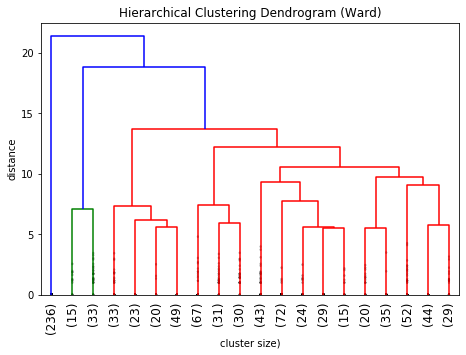

In [16]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

So, Ward is helping us (from the grave). But can we make sense of it?

In [17]:
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df['cluster'+k]=labels

Cluster count- 2 |  db score- 1.14 |  ch score -  163.87 |  ss score -  0.19
Cluster count- 3 |  db score- 1.27 |  ch score -  169.06 |  ss score -  0.22
Cluster count- 4 |  db score- 1.7 |  ch score -  151.62 |  ss score -  0.26
Cluster count- 5 |  db score- 2.0 |  ch score -  141.16 |  ss score -  0.28
Cluster count- 6 |  db score- 2.08 |  ch score -  131.83 |  ss score -  0.31
Cluster count- 7 |  db score- 1.91 |  ch score -  124.82 |  ss score -  0.32
Cluster count- 8 |  db score- 1.83 |  ch score -  120.28 |  ss score -  0.34
Cluster count- 9 |  db score- 1.63 |  ch score -  117.46 |  ss score -  0.35
Cluster count- 10 |  db score- 1.59 |  ch score -  113.19 |  ss score -  0.37


Quick cheat sheet:

Davies Bouldin Score → as low as possible

Calinski-Harabasz → as high as possible

Silhouette-score → is a -1 to +1 thing. 0 is bad while values closer to the edges are better.

The above code can look a little weird, but the clustering in itself is super easy:

In [18]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
df['cluster']=labels

If we want to explore a little and not calculate the scores first, we can do something pretty easy in a loop. Remember, this is like talking to Lassie and hoping it is telling us something important!

![lassie](https://cdn2.lamag.com/wp-content/uploads/sites/6/2018/07/Lassie_Jon_Provost_1961-1068x689.jpg)



... and the results for 2 clusters are!
cluster2              0          1
criminals          0.41       0.00
diffrace           0.09       0.00
leftwings          0.12       0.00
alcoholics         0.48       0.00
rightwings         0.29       0.00
manykids           0.05       0.00
neurotics          0.19       0.00
muslims            0.22       0.00
imigrants          0.14       0.00
aids               0.07       0.00
addicts            0.80       0.00
homoseksuals       0.10       0.00
jews               0.03       0.00
gypsies            0.20       0.00
age               44.66      48.15
income        386855.31  380311.02
edu                1.68       1.60

And the size of the clusters if there are 2 clusters are
cluster2
0    664
1    236
Name: id, dtype: int64

And if we have 2 clusters, the dendrogram looks like


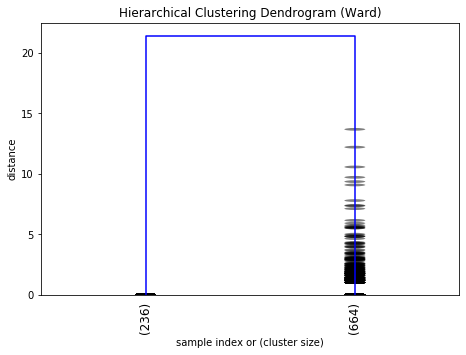



... and the results for 3 clusters are!
cluster3              0          1          2
criminals          0.37       0.00       0.90
diffrace           0.03       0.00       0.94
leftwings          0.09       0.00       0.56
alcoholics         0.45       0.00       0.90
rightwings         0.28       0.00       0.42
manykids           0.03       0.00       0.33
neurotics          0.17       0.00       0.50
muslims            0.16       0.00       0.98
imigrants          0.08       0.00       0.96
aids               0.05       0.00       0.38
addicts            0.79       0.00       0.96
homoseksuals       0.07       0.00       0.48
jews               0.01       0.00       0.27
gypsies            0.16       0.00       0.81
age               43.76      48.15      56.21
income        394456.21  380311.02  289310.42
edu                1.71       1.60       1.35

And the size of the clusters if there are 3 clusters are
cluster3
0    616
1    236
2     48
Name: id, dtype: int64

And if we ha

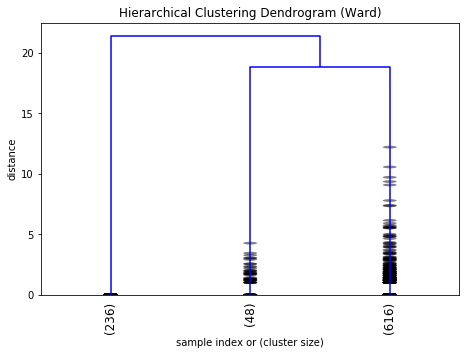



... and the results for 4 clusters are!
cluster4              0          1          2          3
criminals          0.41       0.23       0.90       0.00
diffrace           0.04       0.00       0.94       0.00
leftwings          0.04       0.26       0.56       0.00
alcoholics         0.50       0.28       0.90       0.00
rightwings         0.11       0.94       0.42       0.00
manykids           0.03       0.02       0.33       0.00
neurotics          0.21       0.00       0.50       0.00
muslims            0.19       0.02       0.98       0.00
imigrants          0.09       0.02       0.96       0.00
aids               0.06       0.00       0.38       0.00
addicts            0.82       0.69       0.96       0.00
homoseksuals       0.09       0.00       0.48       0.00
jews               0.02       0.00       0.27       0.00
gypsies            0.18       0.05       0.81       0.00
age               44.56      40.66      56.21      48.15
income        393295.37  399016.00  289310.42 

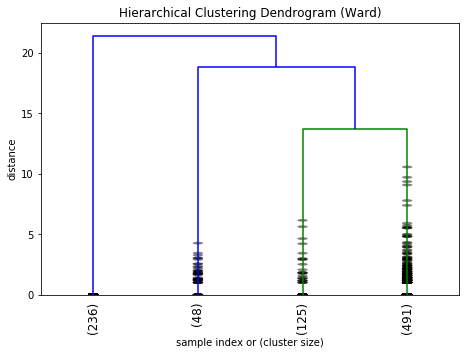



... and the results for 5 clusters are!
cluster5              0          1          2          3          4
criminals          0.25       0.87       0.90       0.00       0.23
diffrace           0.04       0.03       0.94       0.00       0.00
leftwings          0.03       0.09       0.56       0.00       0.26
alcoholics         0.37       0.86       0.90       0.00       0.28
rightwings         0.11       0.09       0.42       0.00       0.94
manykids           0.03       0.02       0.33       0.00       0.02
neurotics          0.18       0.29       0.50       0.00       0.00
muslims            0.15       0.30       0.98       0.00       0.02
imigrants          0.09       0.11       0.96       0.00       0.02
aids               0.02       0.18       0.38       0.00       0.00
addicts            0.76       0.97       0.96       0.00       0.69
homoseksuals       0.03       0.27       0.48       0.00       0.00
jews               0.02       0.02       0.27       0.00       0.00
gypsie

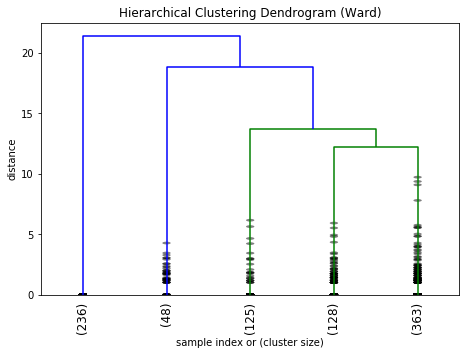

In [19]:
for i in range(2,6):
    i=str(i)
    X_1=df[['cluster'+i,'criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies', 'age', 'income', 'edu']]
    stuff=X_1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=df.groupby(['cluster'+i])['id'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()

# You get to play!

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?